![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# GetAround 

[GetAround](https://www.getaround.com/?wpsrc=Google+Organic+Search) est comme Airbnb, mais pour les voitures. Vous pouvez louer des voitures à n'importe qui pour quelques heures à quelques jours ! Fondée en 2009, cette entreprise a connu une croissance rapide. En 2019, ils comptent plus de 5 millions d'utilisateurs et environ 20 000 voitures disponibles dans le monde entier.

## Contexte 

Lors de la location d'une voiture, nos utilisateurs doivent effectuer un processus de check-in au début de la location et un processus de check-out à la fin de la location afin de :

* Évaluer l'état de la voiture et informer les autres parties des dommages préexistants ou des dommages survenus pendant la location.
* Comparer les niveaux de carburant.
* Mesurer le nombre de kilomètres parcourus.

## Projet 🚧

Dans cette étude de cas, nous suggérons que vous vous mettiez dans notre peau et que vous examiniez une analyse que nous avons réalisée en 2017.

Lorsqu'ils utilisent Getaround, les conducteurs réservent des voitures pour une période de temps spécifique, allant d'une heure à quelques jours. Ils sont censés ramener la voiture à temps, mais il arrive parfois que les conducteurs soient en retard pour le retour.

Les retours tardifs au moment du départ peuvent générer une forte friction pour le conducteur suivant si la voiture était censée être louée à nouveau le même jour : Le service client signale souvent des utilisateurs mécontents parce qu'ils ont dû attendre que la voiture revienne de la location précédente ou des utilisateurs qui ont même dû annuler leur location parce que la voiture n'était pas revenue à temps.


## Objectifs 🎯

Pour atténuer ces problèmes, nous avons décidé de mettre en place un délai minimum entre deux locations. Une voiture ne sera pas affichée dans les résultats de recherche si les heures de check-in ou de check-out demandées sont trop proches d'une location déjà réservée.

Cela résout le problème des retours tardifs lors du départ, mais cela pourrait aussi potentiellement nuire aux revenus de Getaround/propriétaires : nous devons trouver le bon compromis.

Notre chef de produit doit encore décider :

* Seuil : quelle devrait être la durée minimale du délai ?
* Portée : devrions-nous activer la fonctionnalité pour toutes les voitures ? Uniquement pour les voitures Connect ?

Pour les aider à prendre la bonne décision, ils vous demandent des informations basées sur les données. Voici les premières analyses auxquelles ils ont pensé pour lancer la discussion. N'hésitez pas à effectuer des analyses supplémentaires que vous jugez pertinentes.

* Quelle part des revenus de nos propriétaires serait potentiellement affectée par la fonctionnalité ?
* Combien de locations seraient affectées par la fonctionnalité en fonction du seuil et de la portée que nous choisissons ?
* À quelle fréquence les conducteurs sont-ils en retard pour le prochain check-in ? Comment cela impacte-t-il le conducteur suivant ?
* Combien de cas problématiques résoudra-t-il en fonction du seuil et de la portée choisis ?

### Web dashboard

Commencez par créer un tableau de bord qui aidera l'équipe de gestion des produits avec les questions ci-dessus. Vous pouvez utiliser streamlit ou toute autre technologie que vous jugez appropriée.


### Machine Learning - `/predict` endpoint

En plus de la question ci-dessus, l'équipe de Data Science travaille sur l'optimisation des prix. Ils ont rassemblé des données pour suggérer des prix optimaux aux propriétaires de voitures en utilisant l'apprentissage automatique.

Vous devez fournir au moins un point d'accès /predict. L'URL complète ressemblerait à quelque chose comme ceci : https://votre-url.com/predict.

Ce point d'accès accepte la méthode POST avec des données d'entrée au format JSON et il devrait renvoyer les prédictions. **Nous supposons que les entrées seront toujours bien formatées**. Cela signifie que vous n'avez pas à gérer les erreurs. Nous laissons la gestion des erreurs en tant que bonus.


### Documentation de page

Vous devez fournir aux utilisateurs une documentation concernant votre API.

Elle doit être située à /docs de votre site Web. Si nous prenons l'exemple d'URL ci-dessus, elle devrait être directement située à https://votre-url.com/docs.

Cette petite documentation doit au moins inclure :

* Un titre h1 : le titre est à votre discrétion.
* Une description de chaque point d'accès que l'utilisateur peut appeler avec le nom du point d'accès, la méthode HTTP, l'entrée requise et la sortie attendue (vous pouvez donner un exemple).

Vous êtes libre d'ajouter d'autres informations pertinentes et de styliser votre HTML comme vous le souhaitez.

### Online production

Vous devez **héberger votre API en ligne**. Nous vous recommandons d'utiliser Heroku car c'est gratuit. Mais vous êtes libre de choisir tout autre fournisseur d'hébergement.

## Deliverable 📬

Pour compléter ce projet, vous devez fournir :

* Un tableau de bord en production (accessible via une page web par exemple).
* L'ensemble du code stocké dans un dépôt Github. Vous inclurez l'URL du dépôt.
* Une API en ligne documentée sur un serveur Heroku (ou tout autre fournisseur que vous choisissez) contenant au moins un point d'accès /predict qui respecte la description technique ci-dessus. Nous devrions pouvoir demander le point d'accès de l'API /predict en utilisant curl.

# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
data_pricing = pd.read_csv("get_around_pricing_project.csv", error_bad_lines=False, engine='python')
data_delay = pd.read_excel("get_around_delay_analysis.xlsx")

C:\Users\33671\AppData\Local\Temp\ipykernel_6956\3237964560.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_pricing = pd.read_csv("get_around_pricing_project.csv", error_bad_lines=False, engine='python')


# 1. Analyse de data_pricing

#### 1.1 Analyse globale et transformation du dataset

L'analyse des données de prix de location de véhicules nous permettra d'identifier les tendances et les facteurs influençant les prix de location quotidiens. Nous débuterons par une exploration des statistiques descriptives pour avoir un aperçu global des données.

Ensuite, nous examinerons les valeurs manquantes pour évaluer la qualité du dataset. Un histogramme des prix de location nous aidera à visualiser leur répartition et à détecter d'éventuelles anomalies. 

Enfin, une matrice de corrélation nous permettra de comprendre les relations entre les différentes variables, offrant des pistes pour des analyses plus approfondies.

In [3]:
data_pricing

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [4]:
# Stats basiques
print("Nombre de lignes : {}".format(data_pricing.shape[0]))
print()

print("Display du dataset: ")
display(data_pricing.head())
print()

print("Basique stats: ")
data_desc = data_pricing.describe(include='all')
display(data_desc)
print()

print("Pourcentage de missing values: ")
display(100*data_pricing.isnull().sum()/data_pricing.shape[0])

Nombre de lignes : 4843

Display du dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basique stats: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Pourcentage de missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [5]:
data_pricing.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [6]:
# Supprime la colonne 'Unnamed: 0'
data_pricing.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Graphe de vue d'ensemble sur les prix de location
fig = px.histogram(data_pricing, x='rental_price_per_day', nbins=50,
                   title="Histogramme de la répartition des prix de location")

fig.update_layout(
    title="Histogramme de la répartition des prix de location",
    xaxis_title="Prix de location par jour ($)",
    yaxis_title="Nombre de véhicules",
    title_x=0.5 
)
fig.show()

In [8]:
# Matrix de corrélation
corr_matrix = pd.DataFrame(data_pricing).corr().round(2)
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

L'analyse montre que le prix de location par jour est principalement influencé par la puissance du moteur (0.63), la disponibilité d'un parking privé (0.28) et le kilométrage (-0.45), indiquant que les véhicules plus puissants et avec parking privé sont plus chers, tandis que ceux avec un kilométrage élevé sont moins chers.

Des corrélations notables existent entre winter_tires et has_air_conditioning (0.37), suggérant qu'ils sont souvent équipés ensemble.

Les véhicules équipés de Getaround Connect ont souvent un GPS (0.31) et sont automatiques (0.42). 

Certaines variables, comme has_speed_regulator et le prix de location, montrent peu de corrélation (0.01), indiquant une faible influence sur le prix.

#### 1.2 Identification du prix par modele de voitures, marques et sa puissance

La matrice de corrélation nous a montré que la puissance du moteur et le kilométrage influencent le prix de location des véhicules. Par conséquent, nous allons poussé nos analyses sur ces identifierons ces aspect en identifiant les 7 voitures les plus et les moins chères pour comprendre les extrêmes du marché. Puis, nous examinerons la relation entre le type de véhicule, la puissance du moteur et les prix de location. 

Ces analyses nous permettront de cerner les facteurs déterminants du prix et les segments les plus rentables.

In [9]:
# Trouver les 7 voitures les plus chères
most_expensive_cars = data_pricing.nlargest(7, 'rental_price_per_day')

# Transposer le DataFrame pour une meilleure visualisation
most_expensive_cars_transposed = most_expensive_cars.transpose()

print("Les 7 voitures les plus chères :\n")
most_expensive_cars_transposed

Les 7 voitures les plus chères :



,4753,4684,90,4146,2938,4731,1
model_key,BMW,SEAT,Renault,Suzuki,Renault,Toyota,Citroën
mileage,72515,103222,12402,2970,-64,4530,13929
engine_power,135,140,170,423,230,230,317
fuel,diesel,diesel,hybrid_petrol,petrol,diesel,diesel,petrol
paint_color,blue,grey,grey,red,black,silver,grey
car_type,suv,suv,coupe,suv,sedan,suv,convertible
private_parking_available,False,True,True,True,True,True,True
has_gps,False,True,True,True,True,True,True
has_air_conditioning,True,False,False,True,False,False,False
automatic_car,False,False,False,False,True,True,False


In [10]:
# Trouver les 7 voitures les moins chères
cheapest_cars = data_pricing.nsmallest(7, 'rental_price_per_day')

# Transposer le DataFrame pour une meilleure visualisation
cheapest_cars_transposed = cheapest_cars.transpose()

print("Les 7 voitures les moins chères :\n")
cheapest_cars_transposed

Les 7 voitures les moins chères :



,565,630,879,1255,1832,2829,4356
model_key,Citroën,Peugeot,Peugeot,Citroën,BMW,Audi,BMW
mileage,179358,147558,134156,170381,174524,439060,79685
engine_power,120,105,105,135,85,105,190
fuel,diesel,diesel,diesel,diesel,diesel,diesel,diesel
paint_color,black,white,grey,silver,blue,silver,black
car_type,estate,estate,estate,estate,hatchback,sedan,suv
private_parking_available,False,False,False,True,False,False,False
has_gps,True,True,True,True,True,False,False
has_air_conditioning,False,False,False,False,False,True,False
automatic_car,False,False,False,False,False,False,False


In [11]:
# Vue d'ensemble sur le type de véhicule et sa puissance du moteur par rapport aux prix de location
fig = px.scatter(data_pricing, x='model_key', y='rental_price_per_day',color='engine_power')
fig.show()

In [12]:
# Graphe d'analyse des puissance moteur et type de voiture par prix

fig = px.scatter(data_pricing,
                 x='engine_power',
                 y='rental_price_per_day',
                 color='car_type',
                 facet_col='car_type', 
                 title="Prix de location par puissance du moteur, séparé par type de voiture")

# Mise à jour des titres des axes et du titre principal
fig.update_layout(
    xaxis_title="Puissance ",
    yaxis_title="Prix de location par jour ($)",
    title_x=0.5  # Centre le titre
)

# Mettre à jour les titres des sous-graphes pour les axes x
for axis in fig.layout:
    if axis.startswith('xaxis') and axis != 'xaxis':
        fig.layout[axis].title.text = "Puissance "

fig.show()

Sans surprise, les véhicules de luxe et de sport (Ferrari, Lamborghini) ont des prix de location plus élevés, corrélés à leur puissance moteur. Les SUV, convertibles et coupés sont également plus chers, tandis que les hatchbacks et subcompacts restent abordables. Il aurait été très intéressant de connaitre la variable du nombre de location ainsi que les taux de retards pour chaque marque/modèle pour estimer précisement l'impacte des pertes engendrées.

#### 1.2 Automatique vs manuelle : Influence de prix

Explorons maintenant le type de transmission influence la disponibilité et les prix de location des véhicules. D'abord, nous examinerons la répartition des voitures automatiques et manuelles pour comprendre les préférences du marché. Ensuite, nous analyserons le prix moyen de location pour chaque type de transmission afin de voir si ces préférences se traduisent en différences de prix. Cette analyse globale nous aidera à saisir l'impact de la transmission sur le marché de la location de voitures.

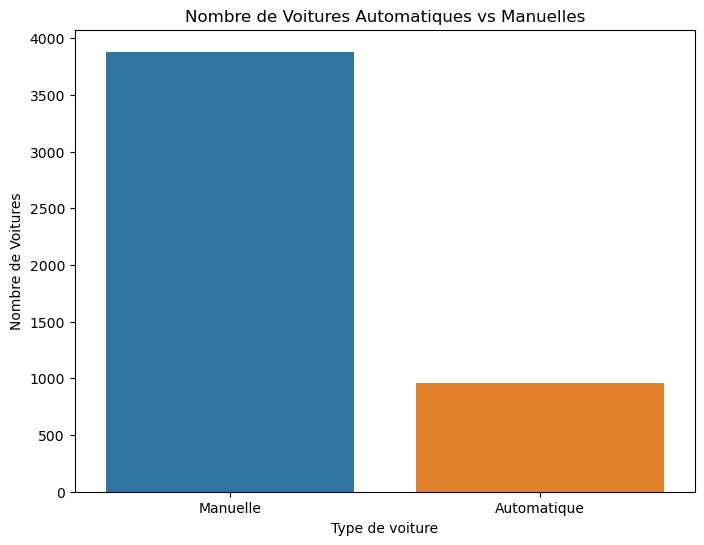

In [13]:
# Compter le nombre de voitures automatiques et manuelles
automatic_counts = data_pricing['automatic_car'].value_counts()

# Créer le graphique
plt.figure(figsize=(8, 6))
sns.barplot(x=automatic_counts.index, y=automatic_counts.values)
plt.title('Nombre de Voitures Automatiques vs Manuelles')
plt.xlabel('Type de voiture')
plt.ylabel('Nombre de Voitures')
plt.xticks(ticks=[0, 1], labels=['Manuelle', 'Automatique'])  # Assurez-vous que les labels sont corrects
plt.show()

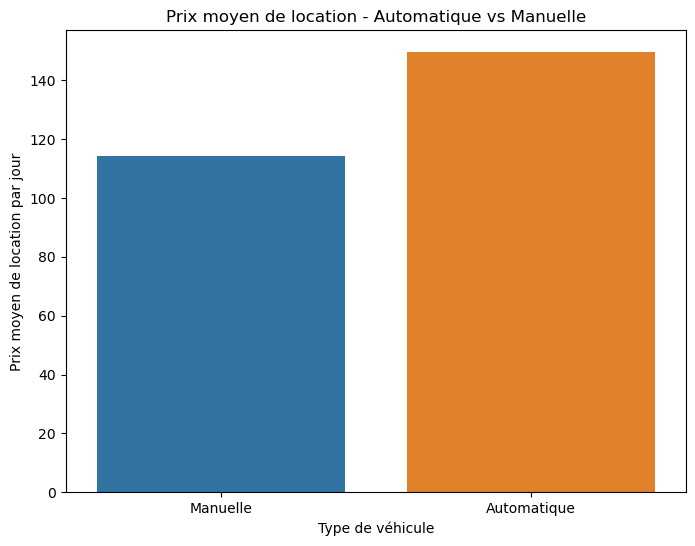

In [14]:
# Calcul du prix moyen de location pour chaque type de transmission
average_prices = data_pricing.groupby('automatic_car')['rental_price_per_day'].mean()

# Graphique de comparaison des prix
plt.figure(figsize=(8, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Prix moyen de location - Automatique vs Manuelle')
plt.xlabel('Type de véhicule')
plt.ylabel('Prix moyen de location par jour')
plt.xticks(ticks=[0, 1], labels=['Manuelle', 'Automatique'])
plt.show()

Nous constaotons une nette prédominance des voitures manuelles sur les voitures automatiques, avec près de quatre fois plus de véhicules manuels disponibles. 

Les voitures automatiques commandent un prix de location moyen significativement plus élevé, d'environ 40 dollars de plus par jour. 

Cette disparité peut suggèrer une forte demande pour les véhicules automatiques malgré leur plus faible disponibilité.

#### 1.3 Influence du prix par type de carburants et kilométrage 

En examinant la distribution des prix par type de carburant, nous identifions comment les préférences énergétiques influencent les tarifs. Une analyse de la relation entre le kilométrage et les prix de location serait pertinente pour révèler l'impact de l'usure des véhicules sur leur attractivité tarifaire.

In [15]:
fig = px.box(data_pricing, x='fuel', y='rental_price_per_day', color='fuel',
             title="Distribution des prix de location par type de carburant")

fig.update_layout(
    title="Distribution des prix de location par type de carburant",
    xaxis_title="Type de carburant",
    yaxis_title="Prix de location par jour",
    title_x=0.5
)

fig.show()

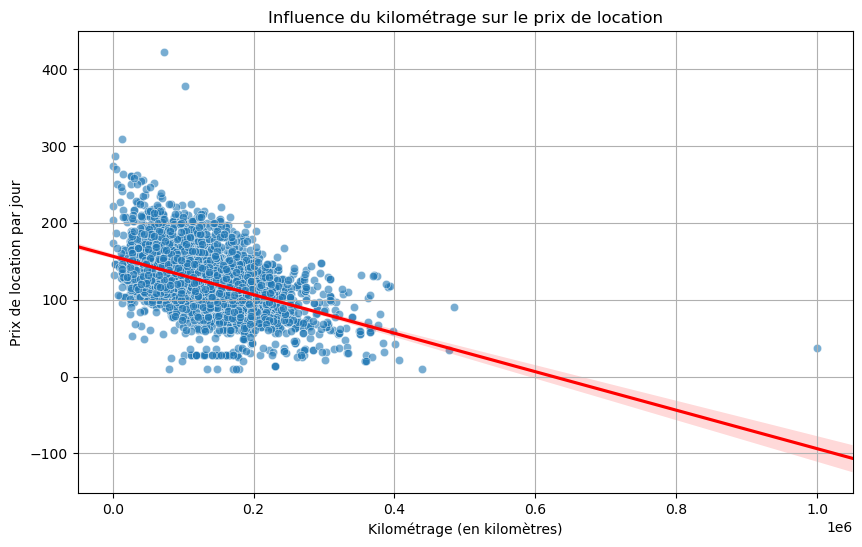

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_pricing, x='mileage', y='rental_price_per_day', alpha=0.6)

# Ajouter une ligne de régression pour visualiser la tendance
sns.regplot(data=data_pricing, x='mileage', y='rental_price_per_day', scatter=False, color='red', truncate=False)

plt.title('Influence du kilométrage sur le prix de location')
plt.xlabel('Kilométrage (en kilomètres)')
plt.ylabel('Prix de location par jour')
plt.grid(True)
plt.show()

Les graphiques révèlent que les véhicules hybrides ont les prix de location les plus élevés, suivis par les voitures à essence, puis diesel, avec les électriques affichant des prix élevés mais constants. 

En toute logique, nous pouvons constater de la  relation négative entre le kilométrage et le prix de location : plus le kilométrage est élevé, plus le prix de location diminue. 

#### 1.4 Influence et présence des options par rapport au prix. 

Dans cette section, l'idée sera de comprendre quelles fonctionnalités sont les plus courantes et lesquelles justifient une augmentation des tarifs, aidant ainsi à optimiser l'offre de location en fonction des préférences et de la disposition à payer des clients.

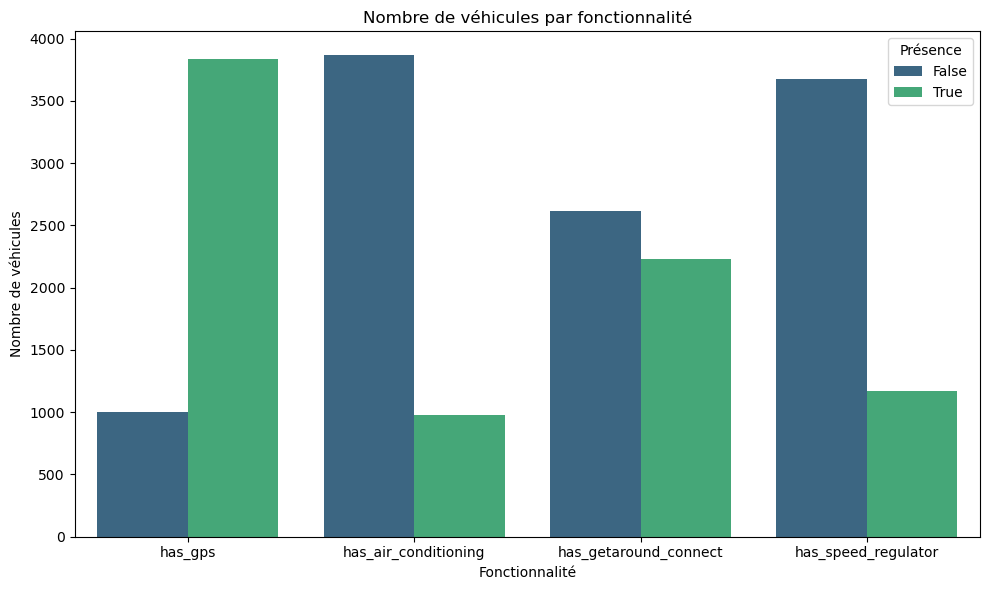

In [17]:
# Graphique du nombre de véhicules par options.

# Définir les features désirées
options = ['has_gps', 'has_air_conditioning', 'has_getaround_connect', 'has_speed_regulator']
data_features = data_pricing[options]

# Transformation des données pour obtenir le comptage
data_melted = data_features.melt(var_name='Feature', value_name='Presence')

plt.figure(figsize=(10, 6))
sns.countplot(data=data_melted, x='Feature', hue='Presence', palette='viridis')

plt.title('Nombre de véhicules par fonctionnalité')
plt.xlabel('Fonctionnalité')
plt.ylabel('Nombre de véhicules')
plt.legend(title='Présence', loc='upper right')

plt.tight_layout()
plt.show()

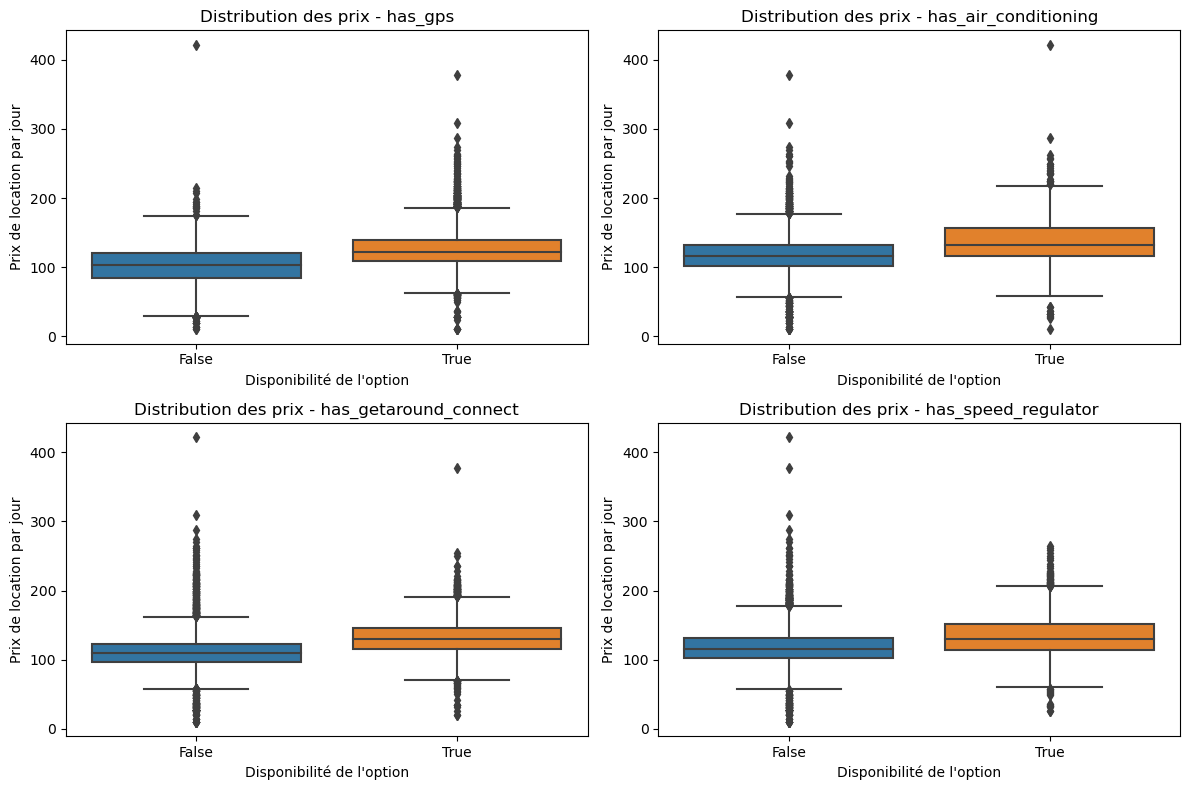

In [18]:
# Distribution des prix par option 
plt.figure(figsize=(12, 8))
for index, option in enumerate(options):
    plt.subplot(2, 2, index + 1)
    sns.boxplot(x=option, y='rental_price_per_day', data=data_pricing)
    plt.title(f'Distribution des prix - {option}')
    plt.xlabel("Disponibilité de l'option")
    plt.ylabel('Prix de location par jour')

plt.tight_layout()
plt.show()

Les options de véhicule influencent le prix de location de manière variable. Les véhicules équipés de GPS et de Getaround Connect tendent à avoir des prix de location plus élevés, indiquant une préférence des utilisateurs pour ces fonctionnalités. La climatisation et le régulateur de vitesse ont un impact moindre, bien que les véhicules avec ces options affichent des prix légèrement plus élevés.

# 2. Analyse de data_delay

#### 1.1 Statistiques globales

Nous identifions la structure et les informations générales du dataset. 

In [19]:
data_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [20]:
# Stats basiques
print("Number of rows : {}".format(data_delay.shape[0]))
print()

print("Display of dataset: ")
display(data_delay.head())
print()

print("Basics statistics: ")
data_desc = data_delay.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data_delay.isnull().sum()/data_delay.shape[0])

Number of rows : 21310

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

#### 1.2 Analyse des données manquantes

Un nombre important de données sont manquantes pour les colonnes "previous_ended_rental_id" et "time_delta_with_previous_rental_in_minutes", bien qu'elles puissent fournir des informations précieuses. Nous allons analyser ces colonnes en relation avec "delay_at_checkout_in_minutes" pour réaliser de potentielles déductions. Nous appliquerons les transformations nécéssaires au dataset suite à cette analyse.

In [21]:
# Préparation des données pour le graphique de type de check-in
checkin_counts = data_delay['checkin_type'].value_counts()

# Préparation des données pour le graphique d'état de la location
state_counts = data_delay['state'].value_counts()

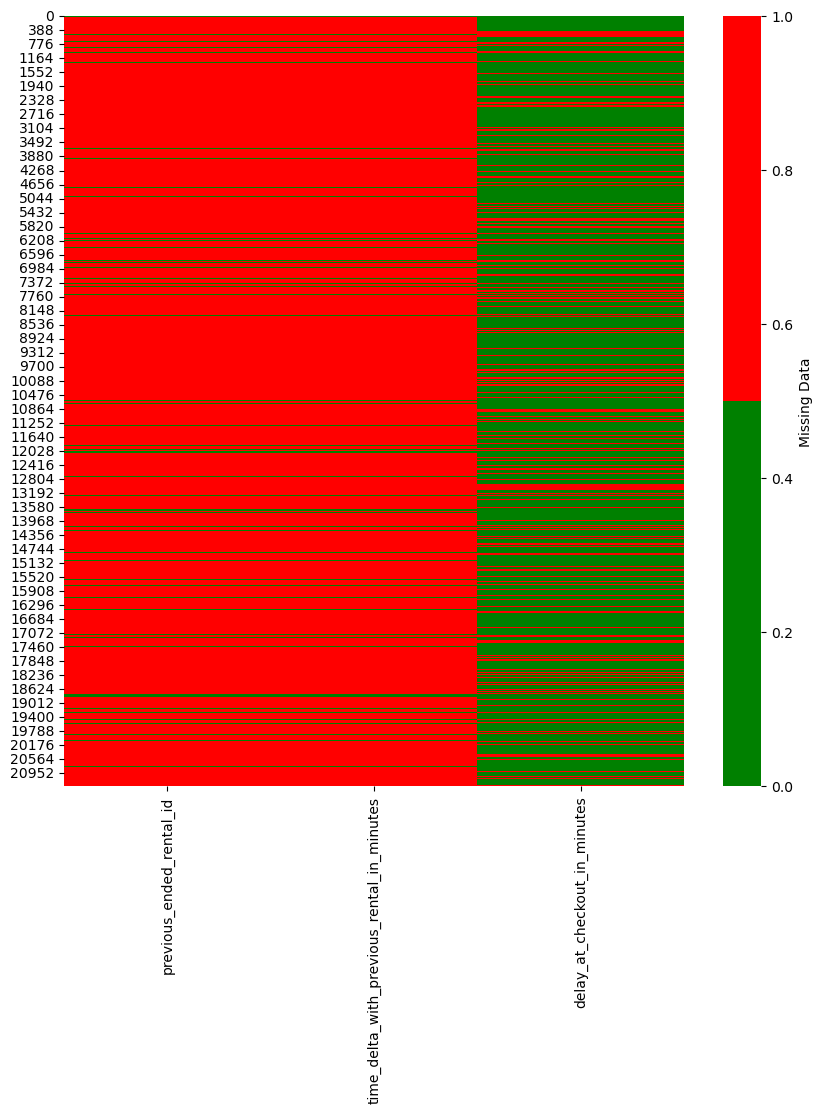

In [22]:
# Création d'une palette de couleurs personnalisée
cmap = ListedColormap(['green', 'red'])

# Visualisation des données manquantes pour les colonnes spécifiées
plt.figure(figsize=(10, 10))
sns.heatmap(data_delay[['previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes', 'delay_at_checkout_in_minutes']].isnull(), cmap=cmap, cbar_kws={'label': 'Missing Data'})
plt.show()

Nous pouvons constater ici que les données de time_delta_with_previous_rental_in_minutes et previous_ended_rental_id partage le même taux de nulles. Nous pouvons voir qu'il s'agit en faite de données non renseignée quand la voiture n'a eu aucun retard. Toutefois, la quantité de null est beaucoup trop importante lorsque la voiture a reçu un checkout en retard, laissant ces deux colonnes inexploitables pour en déduire des hypothèses/analyses raisonnables. 

Il est préférable de les supprimer dans le cadre de notre analyse. 

In [23]:
# Suppression des colonnes 'time_delta_with_previous_rental_in_minutes' et 'delay_at_checkout_in_minutes'
data_delay = data_delay.drop(['time_delta_with_previous_rental_in_minutes', 'previous_ended_rental_id'], axis=1)
data_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
0,505000,363965,mobile,canceled,NaN
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
3,508865,299063,connect,canceled,NaN
4,511440,313932,mobile,ended,NaN
...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN
21306,573790,341965,mobile,ended,-337.0
21307,573791,364890,mobile,ended,144.0
21308,574852,362531,connect,ended,-76.0


In [24]:
# Remplacer les NaN dans 'delay_at_checkout_in_minutes' par 'cancelled' lorsque 'state' est 'canceled'
data_delay.loc[(data_delay['state'] == 'canceled') & (data_delay['delay_at_checkout_in_minutes'].isna()), 'delay_at_checkout_in_minutes'] = 'canceled'
data_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
0,505000,363965,mobile,canceled,canceled
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
3,508865,299063,connect,canceled,canceled
4,511440,313932,mobile,ended,NaN
...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN
21306,573790,341965,mobile,ended,-337.0
21307,573791,364890,mobile,ended,144.0
21308,574852,362531,connect,ended,-76.0


In [25]:
data_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
0,505000,363965,mobile,canceled,canceled
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
3,508865,299063,connect,canceled,canceled
4,511440,313932,mobile,ended,NaN
...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN
21306,573790,341965,mobile,ended,-337.0
21307,573791,364890,mobile,ended,144.0
21308,574852,362531,connect,ended,-76.0


Dans cette cellule, le choix stratégique réalisé consiste à séparer les NaN des courses "Canceled" par rapport à celles "ended" de façon a identifier le véritable ratio des valeurs manquantes pour les courses. En effet, les courses Canceled n'ayant jamais eu lieu, elles n'ont naturellement jamais été renseignées. 

In [26]:
print("Pourcentage de missing values: ")
display(100*data_delay.isna().sum()/data_delay.shape[0])

Pourcentage de missing values: 


rental_id                       0.000000
car_id                          0.000000
checkin_type                    0.000000
state                           0.000000
delay_at_checkout_in_minutes    7.977475
dtype: float64

In [27]:
data_delay.dropna(subset=['delay_at_checkout_in_minutes'], inplace=True)

#### 1.3 Analyse des données de nombre de locations et identification des outliers.

Intéressons-nous au cœur de l'analyse : le nombre de locations par type de check-in. Nous allons examiner comment les différents types de check-in (automatique ou manuel) influencent l'état des locations (complet, annulé, etc.). Ensuite, nous explorerons la distribution des délais au check-out pour identifier des tendances et des anomalies. Cette analyse est cruciale pour comprendre l'impact des types de check-in sur la performance des locations et pour optimiser les processus afin de réduire les retards et les annulations.

Nous analyserons également les éventuelles outliers que nous traiterons par le biais de calcul de quantile.

In [28]:
location_number_data = data_delay.groupby(['checkin_type', 'state']).size().unstack(fill_value=0)

print(location_number_data)

state         canceled  ended
checkin_type                 
connect            798   3402
mobile            2467  12943


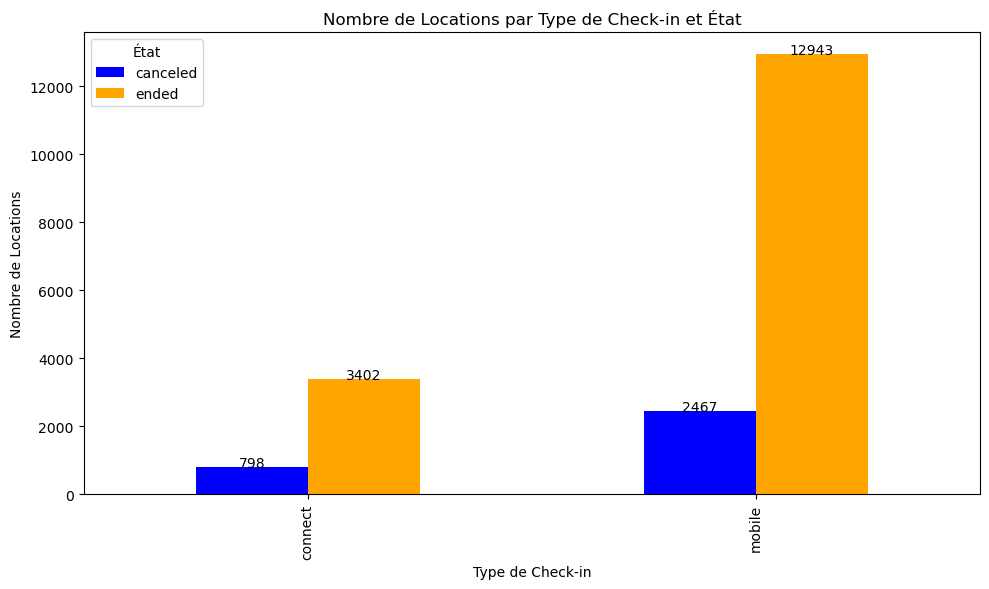

In [29]:
# Création des graphiques à barres groupées
fig, ax = plt.subplots(figsize=(10, 6))

# Les barres sont groupées par 'checkin_type', et chaque groupe a une barre pour chaque 'state'
location_number_data.plot(kind='bar', ax=ax, color=['blue', 'orange'])

ax.set_title('Nombre de Locations par Type de Check-in et État')
ax.set_xlabel('Type de Check-in')
ax.set_ylabel('Nombre de Locations')
ax.legend(title='État')

# Ajouter des étiquettes de pourcentage sur chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center')

plt.tight_layout()
plt.show()

Le graphe montre que les locations utilisant le check-in mobile ont un taux d'annulation plus élevé (2467) par rapport au check-in connect (798), et moins de locations terminées. Cela suggère que le check-in connect, avec ses avantages de flexibilité et de commodité sans contact, réduit significativement les retards et les annulations.

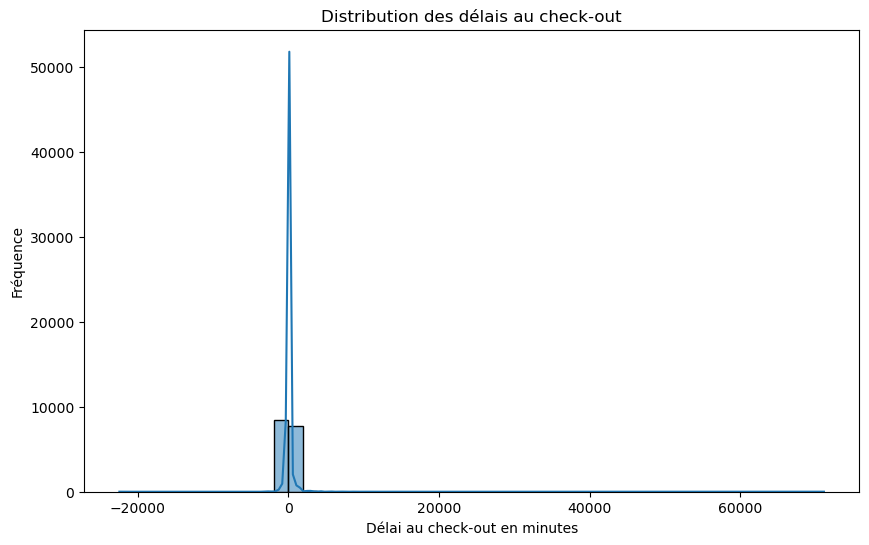

In [30]:
# Convertir la colonne en chaîne de caractères
data_delay['delay_at_checkout_in_minutes'] = data_delay['delay_at_checkout_in_minutes'].astype(str)

# Créer un masque qui exclut les valeurs 'cancelled' et les NaN
mask = (data_delay['delay_at_checkout_in_minutes'] != 'canceled') & (data_delay['delay_at_checkout_in_minutes'] != 'nan')

# Appliquer le masque pour filtrer les données
filtered_delays = data_delay[mask]

# Convertir les valeurs restantes en float pour l'histogramme
filtered_delays['delay_at_checkout_in_minutes'] = filtered_delays['delay_at_checkout_in_minutes'].astype(float)

# Créer l'histogramme des délais filtrés
plt.figure(figsize=(10, 6))
sns.histplot(filtered_delays['delay_at_checkout_in_minutes'], bins=50, kde=True)
plt.title('Distribution des délais au check-out')
plt.xlabel('Délai au check-out en minutes')
plt.ylabel('Fréquence')
plt.show()

Nous constatons des valeurs abérantes dans ce graphique, probablement due à des erreurs de saisies.

In [31]:
# Convertir en numérique, avec 'coerce' pour transformer les non-convertibles en NaN
data_delay['delay_numeric'] = pd.to_numeric(data_delay['delay_at_checkout_in_minutes'], errors='coerce')

# Sélection des données numériques pour le calcul des quantiles
mask_numeric = data_delay['delay_numeric'].notna()
numeric_data = data_delay.loc[mask_numeric, 'delay_numeric']

# Calcul des quantiles
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Assignation des quantiles 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [32]:
# Application du filtrage pour éliminer les outliers en conservant les valeurs 'cancelled'
data_no_outlier_with_canceled = data_delay[(data_delay['delay_numeric'].between(lower_bound, upper_bound)) | 
                             (data_delay['delay_numeric'].isna())]


In [33]:
# check des valeurs 'canceled' dans les données sans outlier
data_no_outlier_with_canceled.loc[data_delay['delay_at_checkout_in_minutes'] == 'canceled', 'delay_numeric'] = 'canceled'


In [34]:
# Suppression de la colonne temporaire 
data_no_outlier_with_canceled.drop('delay_numeric', axis=1, inplace=True)

In [35]:
# Remplacement à nouveau des NaN dans 'delay_at_checkout_in_minutes' par 'cancelled' lorsque 'state' est 'canceled' (sera utile plus tard pour le streamlit)
data_no_outlier_with_canceled.loc[(data_delay['state'] == 'canceled') & (data_no_outlier_with_canceled['delay_at_checkout_in_minutes'].isna()), 'delay_at_checkout_in_minutes'] = 'canceled'
data_no_outlier_with_canceled

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
0,505000,363965,mobile,canceled,canceled
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
3,508865,299063,connect,canceled,canceled
6,511639,370585,connect,ended,-15.0
...,...,...,...,...,...
21303,573305,392752,mobile,ended,72.0
21304,573322,376491,connect,ended,-66.0
21307,573791,364890,mobile,ended,144.0
21308,574852,362531,connect,ended,-76.0


In [36]:
# Filtrer les lignes pour ne conserver que celles où 'delay_at_checkout_in_minutes' est de type int ou float (Dataframe avec lequel nous allons poursuivre)
data_no_outlier = data_no_outlier_with_canceled[data_no_outlier_with_canceled['delay_at_checkout_in_minutes'].apply(lambda x: isinstance(x, (int, float)))]

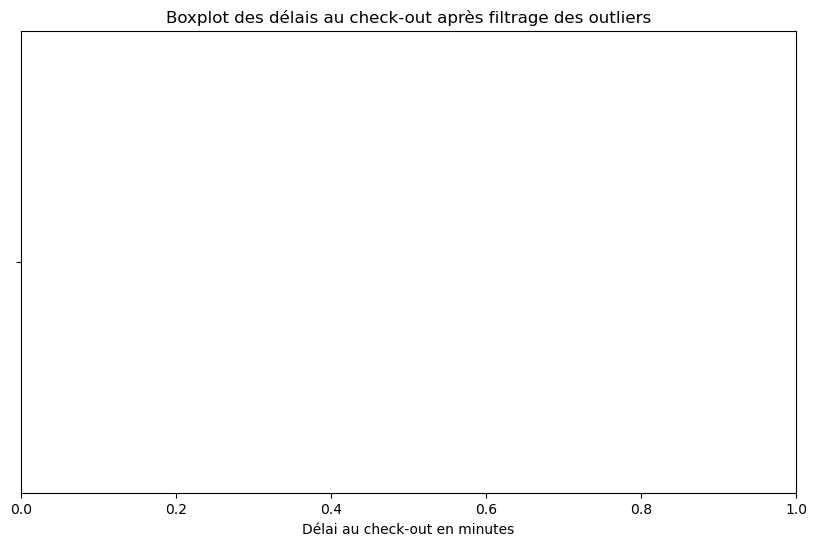

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rental_id                     0 non-null      int64 
 1   car_id                        0 non-null      int64 
 2   checkin_type                  0 non-null      object
 3   state                         0 non-null      object
 4   delay_at_checkout_in_minutes  0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes
None


In [37]:
# Visuel graphique après suppression des outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outlier['delay_at_checkout_in_minutes'])
plt.title('Boxplot des délais au check-out après filtrage des outliers')
plt.xlabel('Délai au check-out en minutes')
plt.show()

print(data_no_outlier.info())

#### 1.3 Analyse des durées de retards avec un focus sur une durée d'une heure.

Explorons les retards au check-out en nous focalisant sur une durée d'une heure. En limitant l'analyse aux retards de moins de 10 heures, nous pouvons identifier des tendances plus claires sans être influencés par les valeurs extrêmes. Nous segmenterons les retards en plusieurs catégories : aucun retard, moins de 10 minutes, entre 10 et 60 minutes, et plus de 60 minutes. Cette approche permet de comprendre les comportements des utilisateurs en fonction du type de check-in, fournissant des insights précieux pour améliorer la gestion des retards.


Description of data distribution

count       0
unique      0
top       NaN
freq      NaN
Name: delay_at_checkout_in_minutes, dtype: object

Plotted distribution



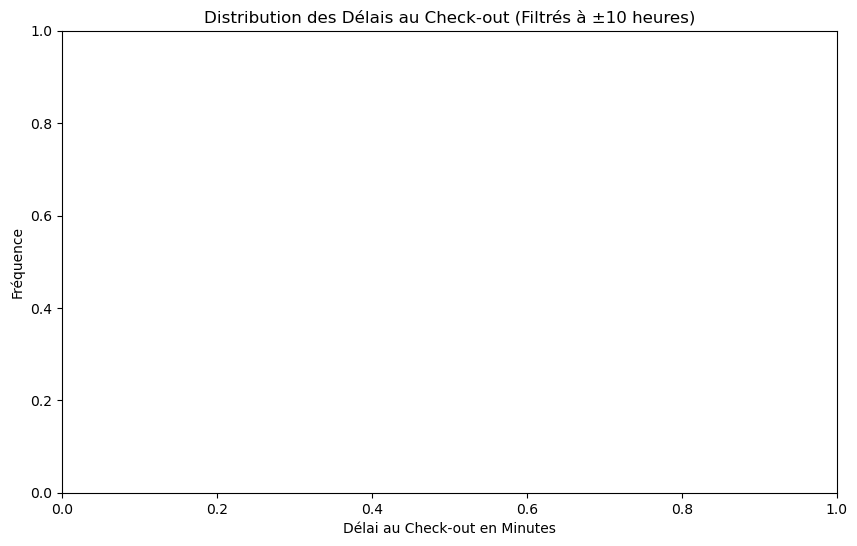

In [38]:
delay_column = 'delay_at_checkout_in_minutes' 

# Appliquer les masques pour limiter les délais à ±600 minutes (10 heures)
mask_late = data_no_outlier[delay_column] < 600  # Délais inférieurs à 600 minutes
mask_early = data_no_outlier[delay_column] > -600  # Délais supérieurs à -600 minutes

# Filtrer les données pour exclure les valeurs extrêmes
filtered_dataset_by_delay = data_no_outlier.loc[mask_late & mask_early]

# Description des données filtrées
print('\nDescription of data distribution\n')
print(filtered_dataset_by_delay[delay_column].describe())

# Visualisation des données filtrées
print('\nPlotted distribution\n')
plt.figure(figsize=(10, 6))
sns.histplot(filtered_dataset_by_delay, x=delay_column, binwidth=30)  # binwidth ajusté pour un meilleur détail
plt.title('Distribution des Délais au Check-out (Filtrés à ±10 heures)')
plt.xlabel('Délai au Check-out en Minutes')
plt.ylabel('Fréquence')
plt.show()

Nous pouvons constater que la distribution suit une loi normale. Toutefois, l'information d'avoir des véhicule rendu en avance n'est pas exploitable puisqu'elle ne permet pas à la société de profiter de la disponibilité du véhicule rendu en avance de façon imprévisible par le client. (Impossible à planifier en général)

In [39]:
# Fonction de segmentation par durée de retard
def delay_re(x):
    if x <= 0:
        return '1- Aucun retard'
    elif x < 10:
        return '2- Retard < 10 mins'
    elif x < 60:
        return '3- 10 ≤ Retard < 60 mins'
    elif x >= 60:
        return '4- Retard ≥ 60'
    else:
        return 'Non communiqué'


In [40]:
# Applique la fonction delay_re et créer une nouvelle colonne 'delay' dans le DataFrame
filtered_dataset_by_delay['delay'] = filtered_dataset_by_delay.delay_at_checkout_in_minutes.apply(lambda x: delay_re(x))

# Tri le DataFrame par la colonne 'delay'
filtered_dataset_delay = filtered_dataset_by_delay.sort_values('delay')


Description de la colonne delay

Series([], Name: delay, dtype: int64)

Plotted distribution



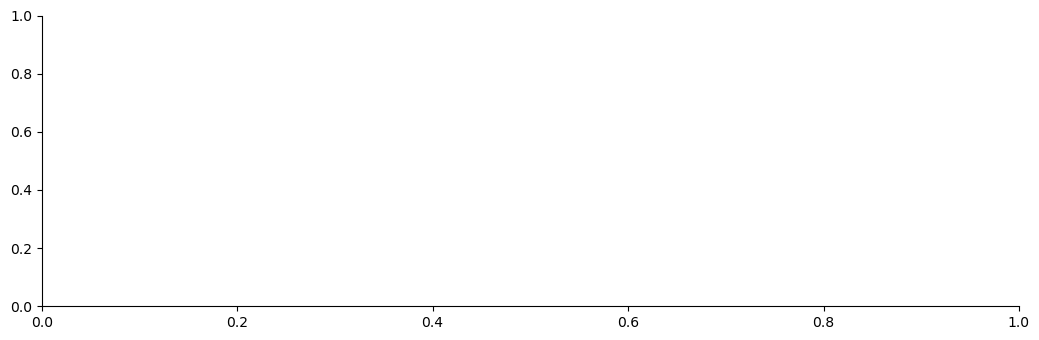

In [41]:
# Description de la colonne delay + graphe
print('\nDescription de la colonne delay\n')
print(filtered_dataset_delay['delay'].value_counts())
print('\nPlotted distribution\n')

# Plot de la colonne delay
sns.displot(filtered_dataset_delay, x= 'delay',stat='percent',
            hue='checkin_type',  height=3.5, aspect=3.)
plt.show()

La majorité des locations n'ont pas de retard ou ont des retards inférieurs à 10 minutes, avec une prédominance des check-ins mobiles par rapport aux check-ins connect pour chaque catégorie de retard. Cependant, les retards de plus de 10 minutes, y compris ceux dépassant une heure, sont également notables (48% en cumulant les deux !). Ces derniers peuvent entraîner et renforcer des annulations et pertes financières importantes.

#### 1.4 Manque à gagner estimé perdu par retards et annulation

Couts calculés de façon unitaire

In [42]:
# Définition du prix médian par jour
median_price_per_day = 119

# Calcul du coût par minute
cost_per_minute = median_price_per_day / 1440

# Calculs pour différentes durées
cost_for_10_minutes = cost_per_minute * 10
cost_for_30_minutes = cost_per_minute * 30
cost_for_1_hour = cost_per_minute * 60

print("Coût par minute: ${:.2f}".format(cost_per_minute))
print("Coût pour 10 minutes: ${:.2f}".format(cost_for_10_minutes))
print("Coût pour 30 minutes: ${:.2f}".format(cost_for_30_minutes))
print("Coût pour 1 heure: ${:.2f}".format(cost_for_1_hour))

Coût par minute: $0.08
Coût pour 10 minutes: $0.83
Coût pour 30 minutes: $2.48
Coût pour 1 heure: $4.96


Couts calculés sur l'ensemble des courses annulées estimé pour une durée d'une heure par annulation

In [43]:
# Calcul du nombre total de courses annulées
mask_canceled = data_delay['state'] == 'canceled'
total_canceled = mask_canceled.sum()

# Calcul du coût total perdu pour les courses annulées (estimé pour une durée d'une heure par annulation)
total_cost_lost = cost_for_1_hour * total_canceled

print("Nombre total de courses annulées: {}".format(total_canceled))
print("Coût total perdu pour les courses annulées: ${:.2f}".format(total_cost_lost))

Nombre total de courses annulées: 3265
Coût total perdu pour les courses annulées: $16188.96


Couts estimées sur l'ensemble des retard (supposant que chaque retard dure exactement 1, 10, 30, ou 60 minutes)

In [44]:
data_delay['delay_at_checkout_in_minutes'] = pd.to_numeric(data_delay['delay_at_checkout_in_minutes'], errors='coerce')

# Filtration des données pour obtenir seulement les courses terminées avec retard
mask_ended = (data_delay['state'] == 'ended') & (data_delay['delay_at_checkout_in_minutes'] > 0)
delayed_data = data_delay[mask_ended]

# Calcul du nombre de retards (indépendamment de leur durée)
count_delays = delayed_data.shape[0]  # nombre de lignes dans delayed_data

# Coûts fixes pour chaque intervalle
cost_for_1_minute = cost_per_minute * 1
cost_for_10_minutes = cost_per_minute * 10
cost_for_30_minutes = cost_per_minute * 30
cost_for_1_hour = cost_per_minute * 60

# Calcul du coût total associé aux retards, supposant que chaque retard dure exactement 1, 10, 30, ou 60 minutes
total_cost_fixed_1_minute = count_delays * cost_for_1_minute
total_cost_fixed_10_minutes = count_delays * cost_for_10_minutes
total_cost_fixed_30_minutes = count_delays * cost_for_30_minutes
total_cost_fixed_1_hour = count_delays * cost_for_1_hour

# Affichage des résultats
print("Coût total si chaque retard durait exactement 1 minute: ${:.2f}".format(total_cost_fixed_1_minute))
print("Coût total si chaque retard durait exactement 10 minutes: ${:.2f}".format(total_cost_fixed_10_minutes))
print("Coût total si chaque retard durait exactement 30 minutes: ${:.2f}".format(total_cost_fixed_30_minutes))
print("Coût total si chaque retard durait exactement 1 heure: ${:.2f}".format(total_cost_fixed_1_hour))

Coût total si chaque retard durait exactement 1 minute: $777.14
Coût total si chaque retard durait exactement 10 minutes: $7771.36
Coût total si chaque retard durait exactement 30 minutes: $23314.08
Coût total si chaque retard durait exactement 1 heure: $46628.17


Représentation graphique du manque à gagner par annulation

In [45]:
# Coûts pour les annulations avec des durées de 1h, 4h, et 8h
durations_cancellations = [60, 240, 480]  # Durées en minutes
costs_cancellations = [cost_per_minute * d * total_canceled for d in durations_cancellations]

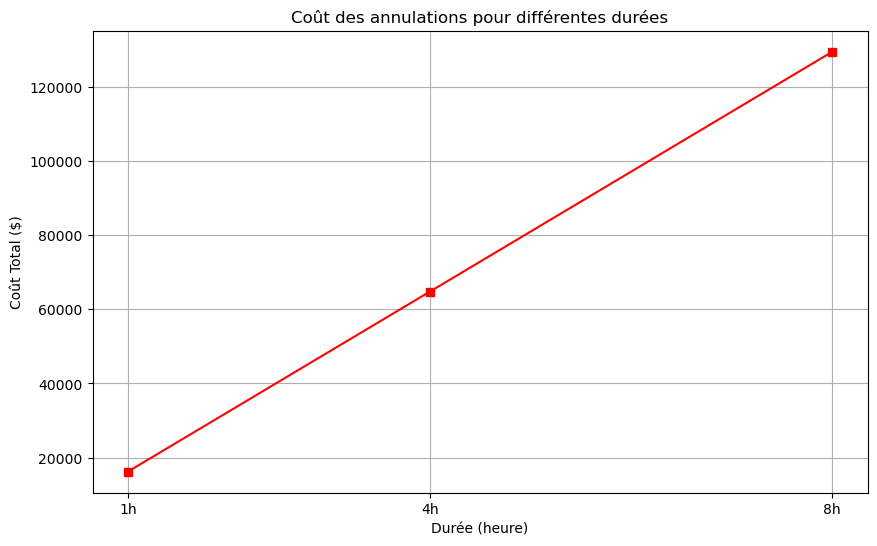

In [46]:
# Plot du coût des annulations
plt.figure(figsize=(10, 6))
plt.plot(durations_cancellations, costs_cancellations, label='Coûts dus aux annulations', color='red', marker='s')
plt.title('Coût des annulations pour différentes durées')
plt.xlabel('Durée (heure)')
plt.ylabel('Coût Total ($)')
plt.xticks(durations_cancellations, [f"{d // 60}h" for d in durations_cancellations])
plt.grid(True)
plt.show()

Représentation graphique du manque à gagner par retard

In [47]:
# Durations and costs as previously calculated for delays
durations_delays = [1, 10, 30, 60]  
costs_delays = [cost_per_minute * d * count_delays for d in durations_delays]

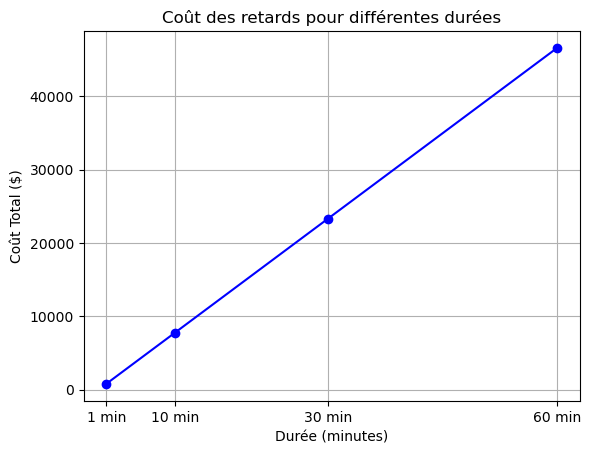

In [48]:
plt.plot(durations_delays, costs_delays, label='Coûts dus aux retards', color='blue', marker='o')
plt.title('Coût des retards pour différentes durées')
plt.xlabel('Durée (minutes)')
plt.ylabel('Coût Total ($)')
plt.xticks(durations_delays, [f"{d} min" for d in durations_delays])
plt.grid(True)
plt.show()

Un retard moyen d'une heure coûte environ 20 000 dollars, montant qui s'élève à plus de 45 000 dollars lorsque tous les retards sont pris en compte. Par ailleurs, les annulations, souvent causées par des retards, peuvent atteindre un coût total de 120 000 dollars pour une durée de 8 heures.

#### 1.5 Création d'un dataset clean et complet pour le Streamlit

Pour une meilleur visualisation lors de l'affichage des données du dataset lors du streamlit, nous utiliserons un dataset qui incorpore les données de façon plus visueles pour une meilleur lecture.

In [49]:
# Adaptation de delay_re pour conserver les valeurs 'canceled'
def delay_re_streamlit(x):
    if isinstance(x, str):  # Vérifier si la valeur est une chaîne de caractères
        if x == 'canceled':
            return 'Annulé'
    elif pd.isna(x):
        return 'Non communiqué'  # Gérer les valeurs NaN
    elif x <= 0:
        return '0- Aucun retard'
    elif x < 10:
        return '1- Retard < 10 mins'
    elif x < 60:
        return '2- 10 ≤ Retard < 60 mins'
    elif x >= 60:
        return '3- Retard ≥ 60'
    else:
        return 'Non communiqué' 

In [50]:
data_no_outlier_with_canceled['delay_category'] = data_no_outlier_with_canceled['delay_at_checkout_in_minutes'].apply(delay_re_streamlit)
data_no_outlier_with_canceled

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,delay_category
0,505000,363965,mobile,canceled,canceled,Annulé
1,507750,269550,mobile,ended,-81.0,None
2,508131,359049,connect,ended,70.0,None
3,508865,299063,connect,canceled,canceled,Annulé
6,511639,370585,connect,ended,-15.0,None
...,...,...,...,...,...,...
21303,573305,392752,mobile,ended,72.0,None
21304,573322,376491,connect,ended,-66.0,None
21307,573791,364890,mobile,ended,144.0,None
21308,574852,362531,connect,ended,-76.0,None


In [51]:
# Export du fichier pour l'utilisation dans Streamlit
data_no_outlier_with_canceled.to_csv('../data_streamlit.csv', index=False)

# Machine Learning data_pricing

# Preprocessing

Plongeons dans la préparation des données pour la modélisation en factorisant les colonnes catégorielles et en standardisant les données. 

La factorisation des variables catégorielles permet de les transformer en valeurs numériques, facilitant leur utilisation dans les modèles de machine learning. Cette étape est cruciale pour s'assurer que toutes les variables, qu'elles soient numériques ou catégorielles, sont traitées de manière appropriée, permettant ainsi une meilleure performance des modèles prédictifs. 

Nous allons séparer les caractéristiques des cibles, détecter automatiquement les colonnes numériques et catégorielles, et appliquer des pipelines de transformation pour normaliser et encoder les données, assurant ainsi une préparation efficace et structurée pour la modélisation.

In [52]:
# Factorisation des colonnes catégorielles

data_pricing['factorized_model_key'] = pd.factorize(data_pricing['model_key'])[0]
data_pricing['factorized_fuel'] = pd.factorize(data_pricing['fuel'])[0]
data_pricing['factorized_paint_color'] = pd.factorize(data_pricing['paint_color'])[0]
data_pricing['factorized_car_type'] = pd.factorize(data_pricing['car_type'])[0]
data_pricing['factorized_private_parking_available'] = pd.factorize(data_pricing['private_parking_available'])[0]
data_pricing['factorized_has_gps'] = pd.factorize(data_pricing['has_gps'])[0]
data_pricing['factorized_has_air_conditioning'] = pd.factorize(data_pricing['has_air_conditioning'])[0]
data_pricing['factorized_automatic_car'] = pd.factorize(data_pricing['automatic_car'])[0]
data_pricing['factorized_has_getaround_connect'] = pd.factorize(data_pricing['has_getaround_connect'])[0]
data_pricing['factorized_has_speed_regulator'] = pd.factorize(data_pricing['has_speed_regulator'])[0]
data_pricing['factorized_winter_tires'] = pd.factorize(data_pricing['winter_tires'])[0]

In [53]:
# Séparation des caractéristiques (features) et de la variable cible (target)
features_list = [
    "factorized_model_key",
    "mileage",
    "engine_power",
    "factorized_fuel",
    "factorized_paint_color", 
    "factorized_car_type",
    "factorized_private_parking_available", 
    "factorized_has_gps",
    "factorized_has_air_conditioning", 
    "factorized_automatic_car",
    "factorized_has_getaround_connect", 
    "factorized_has_speed_regulator",
    "factorized_winter_tires"
]

target_variable = "rental_price_per_day"

# Sélection des caractéristiques et de la variable cible
X = data_pricing.loc[:, features_list]
Y = data_pricing.loc[:, target_variable]

In [54]:
# Détection automatique des colonnes numériques et catégorielles
numeric_features = []
categorical_features = []
for i, t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)):
        numeric_features.append(i)
    else:
        categorical_features.append(i)

print('\n Features numériques ', numeric_features)
print('\n Features catégoriques ', categorical_features)


 Features numériques  ['factorized_model_key', 'mileage', 'engine_power', 'factorized_fuel', 'factorized_paint_color', 'factorized_car_type', 'factorized_private_parking_available', 'factorized_has_gps', 'factorized_has_air_conditioning', 'factorized_automatic_car', 'factorized_has_getaround_connect', 'factorized_has_speed_regulator', 'factorized_winter_tires']

 Features catégoriques  []


In [55]:
# Pipeline pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Les valeurs manquantes seront remplacées par la moyenne des colonnes
    ('scaler', StandardScaler())
])

# Pipeline pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))  # La première colonne sera supprimée pour éviter de créer des corrélations entre les caractéristiques
])

# Utilisation de ColumnTransformer pour créer un objet preprocessor qui décrit tous les traitements à effectuer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [56]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Prétraitement des données d'entraînement
print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5, :])  # X_train est maintenant un tableau numpy
print()

# Prétraitement des données de test
print("Preprocessing X_test...")
print()
X_test = preprocessor.transform(X_test)  # Ne pas ajuster à nouveau !! L'ensemble de test est utilisé pour valider les décisions
# que nous avons prises en fonction de l'ensemble d'entraînement, donc nous ne pouvons appliquer que les transformations
# qui ont été paramétrées en utilisant l'ensemble d'entraînement.
# Sinon, cela crée une fuite de l'ensemble de test qui introduira un biais dans tous vos résultats.
print("...Done!")
print(X_test[0:5, :])  # X_test est maintenant un tableau numpy
print()

Preprocessing X_train...

...Done!
[[-0.78664992 -1.30330331  0.16025818 -0.19857198  0.73016894 -0.97369749
  -0.90232246 -0.51227545 -0.50111828 -0.50154826 -1.08751658 -1.77908336
  -0.26659047]
 [-0.07982876 -0.87224467 -0.61136054 -0.19857198  0.73016894  1.49935796
   1.10825126  1.9520748  -0.50111828 -0.50154826  0.91952621  0.56208721
   3.75107177]
 [-0.36255722 -1.02401108  0.16025818 -0.19857198  0.73016894  0.26283023
  -0.90232246 -0.51227545 -0.50111828  1.99382609 -1.08751658  0.56208721
  -0.26659047]
 [ 0.20289971 -0.18850761 -0.61136054 -0.19857198 -0.07236506 -0.35543363
   1.10825126 -0.51227545 -0.50111828 -0.50154826  0.91952621  0.56208721
  -0.26659047]
 [-0.78664992 -0.40504554 -0.61136054 -0.19857198 -0.87489905 -0.35543363
  -0.90232246  1.9520748  -0.50111828 -0.50154826  0.91952621 -1.77908336
  -0.26659047]]

Preprocessing X_test...

...Done!
[[-0.36255722  0.89435154 -1.12577302 -0.19857198 -0.87489905 -0.97369749
   1.10825126 -0.51227545 -0.50111828 -0

# Entrainement des modèles

Pour prédire les prix de location de véhicules, nous allons entraîner plusieurs modèles de régression : la régression linéaire, l'arbre de décision, la random forest et le gradient boosting. Nous évaluerons chacun de ces modèles en termes de Mean Squared Error (MSE) et de coefficient de détermination (R2) pour déterminer lequel offre les meilleures performances.

#### 1. Régression linéaire

In [57]:
# Régression linéaire
print("Training Linear Regression model...")
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lr = lin_reg.predict(X_test)
print("...Done!")


Training Linear Regression model...
...Done!


In [58]:
# Évaluation du modèle
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 378.73420971893097
Linear Regression R2: 0.662583412169814


#### 2. Arbre de décision

In [59]:
# Arbre de décision
print("Training Decision Tree model...")
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, Y_train)
Y_pred_tree = tree_reg.predict(X_test)
print("...Done!")


Training Decision Tree model...
...Done!


In [60]:
# Évaluation du modèle
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R2: {r2_tree}")

Decision Tree MSE: 490.597853014038
Decision Tree R2: 0.5629234188174853


#### 3. Forêt aléatoire

In [61]:
# Forêt aléatoire
print("Training Random Forest model...")
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, Y_train)
Y_pred_forest = forest_reg.predict(X_test)
print("...Done!")

Training Random Forest model...


...Done!


In [62]:
# Évaluation du modèle
mse_forest = mean_squared_error(Y_test, Y_pred_forest)
r2_forest = r2_score(Y_test, Y_pred_forest)
print(f"Random Forest MSE: {mse_forest}")
print(f"Random Forest R2: {r2_forest}")

Random Forest MSE: 266.8439912469034
Random Forest R2: 0.7622670815072725


#### 4. Gradient Boosting

In [63]:
# Gradient Boosting
print("Training Gradient Boosting model...")
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train, Y_train)
Y_pred_gb = gb_reg.predict(X_test)
print("...Done!")

Training Gradient Boosting model...
...Done!


In [64]:
# Évaluation du modèle
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R2: {r2_gb}")

Gradient Boosting MSE: 270.29721865862956
Gradient Boosting R2: 0.7591905804139834


#### 5. Résumé des modèles

In [65]:
# Résumé des performances des modèles
print("\nModel Performance Summary:")
print(f"Linear Regression: MSE = {mse_lr}")
print(f"Linear Regression: , R2 = {r2_lr}")
print(f"Decision Tree: MSE = {mse_tree}")
print(f"Decision Tree: R2 = {r2_tree}")
print(f"Random Forest: MSE = {mse_forest}")
print(f"Random Forest: R2 = {r2_forest}")
print(f"Gradient Boosting: MSE = {mse_gb}")
print(f"Gradient Boosting: R2 = {r2_gb}")


Model Performance Summary:
Linear Regression: MSE = 378.73420971893097
Linear Regression: , R2 = 0.662583412169814
Decision Tree: MSE = 490.597853014038
Decision Tree: R2 = 0.5629234188174853
Random Forest: MSE = 266.8439912469034
Random Forest: R2 = 0.7622670815072725
Gradient Boosting: MSE = 270.29721865862956
Gradient Boosting: R2 = 0.7591905804139834


Les résultats montrent que le modèle Random Forest a les meilleures performances avec le plus bas Mean Squared Error (MSE) et le plus haut R² parmi les modèles testés

#### 6. Optimisation du meilleur modèle: Random Forest 

Optimisons notre modèle de Random forest, le plus performant parmi ceux testés, en explorant différentes combinaisons d'hyperparamètres. L'utilisation de GridSearchCV nous permet de trouver les paramètres optimaux pour améliorer la performance du modèle.

Ce GridSearchCV permettra une recherche exhaustive à travers une grille spécifiée d'hyperparamètres et d'utiliser une  cross-validation pour évaluer chaque combinaison, garantissant ainsi que nous trouvons les meilleures configurations en limitant les risques d'overfitting. 

In [66]:
# Définir la grille d'hyperparamètres à explorer
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Créer un modèle RandomForest
rf = RandomForestRegressor(random_state=0)

# Utiliser GridSearchCV pour trouver la meilleure combinaison d'hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

In [67]:
# Entraîner GridSearchCV
print("Optimizing Random Forest model with GridSearchCV...")
grid_search.fit(X_train, Y_train)
print("...Done!")

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters found: ", grid_search.best_params_)

Optimizing Random Forest model with GridSearchCV...


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\33671\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\33671\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\33671\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\33671\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\33671\anaconda3\lib\site-pack

...Done!
Best hyperparameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [68]:
# Entraîner le modèle avec les meilleurs hyperparamètres
best_rf = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
Y_pred_best_rf = best_rf.predict(X_test)

In [70]:
# Évaluation du modèle optimisé
mse_best_rf = mean_squared_error(Y_test, Y_pred_best_rf)
r2_best_rf = r2_score(Y_test, Y_pred_best_rf)
print(f"Optimized Random Forest MSE: {mse_best_rf}")
print(f"Optimized Random Forest R2: {r2_best_rf}")

Optimized Random Forest MSE: 256.68307229854224
Optimized Random Forest R2: 0.7713195053781434


L'optimisation des hyperparamètres du modèle de forêt aléatoire a conduit à une amélioration des performances. La légère réduction de la MSE et l'augmentation du R2 montrent que le modèle optimisé est plus précis et explique mieux les variations des prix de location de véhicules.

# Axes d'améliorations du modèle

- Création de nouvelles des features à partir des existantes pour mieux capturer les relations dans les données.

- Optimisation plus complexes sur les paramètres du Gridsearch afin de pénaliser le modèle de façon à le simplifier et réduire les risques d'overfitting.

- En plus de Random Forest et Gradient Boosting, explorer d'autres techniques de Bagging et Boosting tel que XGBoost ou CatBoost, qui peuvent offrir des améliorations significatives en performance.

- Utiliser des techniques de stacking pour combiner plusieurs modèles différents, capturant ainsi une diversité de prévisions et réduisant le risque d'overfiting.